Listado de 

In [1]:
! ls autonomicas*.pdf

autonomicas_ciudadanos.pdf  autonomicas_iu.pdf	autonomicas_podemos.pdf  autonomicas_pp.pdf  autonomicas_psoe.pdf  autonomicas_upyd.pdf


In [2]:
%%bash
# for i in autonomicas*.pdf ; do pdf2txt -o "$i.txt" "$i" ; done

In [3]:
! ls autonomicas*

autonomicas_ciudadanos.pdf  autonomicas_iu.pdf	autonomicas_podemos.pdf  autonomicas_pp.pdf  autonomicas_psoe.pdf  autonomicas_upyd.pdf
autonomicas_ciudadanos.txt  autonomicas_iu.txt	autonomicas_podemos.txt  autonomicas_pp.txt  autonomicas_psoe.txt  autonomicas_upyd.txt


Antes de seguir, debemos instalar el paquete **Cython** para poder instalar el paquete [Word Cloud](https://github.com/amueller/word_cloud).

In [1]:
%%bash
pip install cython
pip install git+git://github.com/amueller/word_cloud.git

  Cloning git://github.com/amueller/word_cloud.git to /tmp/pip-i9VFky-build
  Running setup.py install for wordcloud


Antes de nada, debemos quitar las palabras irrelevantes de los textos, denominadas **stopwords**. Para ello, utilizaremos el paquete [**nltk**](https://github.com/nltk/nltk) (Natural Language Toolkit).

In [1]:
%%bash
pip install nltk

Importamos los paquetes necesarios:

In [1]:
from os import path
%pylab inline

import codecs, string
import matplotlib.pyplot as plt

import nltk

from wordcloud import WordCloud

Populating the interactive namespace from numpy and matplotlib


Hay que **descargar las stopwords** del lenguaje español, ya que es el que trataremos:

In [2]:
nltk.download("stopwords")
spanish_stopwords = set ( nltk.corpus.stopwords.words('spanish') )

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
spanish_stopwords

{u'a',
 u'al',
 u'algo',
 u'algunas',
 u'algunos',
 u'ante',
 u'antes',
 u'como',
 u'con',
 u'contra',
 u'cual',
 u'cuando',
 u'de',
 u'del',
 u'desde',
 u'donde',
 u'durante',
 u'e',
 u'el',
 u'ella',
 u'ellas',
 u'ellos',
 u'en',
 u'entre',
 u'era',
 u'erais',
 u'eran',
 u'eras',
 u'eres',
 u'es',
 u'esa',
 u'esas',
 u'ese',
 u'eso',
 u'esos',
 u'esta',
 u'estaba',
 u'estabais',
 u'estaban',
 u'estabas',
 u'estad',
 u'estada',
 u'estadas',
 u'estado',
 u'estados',
 u'estamos',
 u'estando',
 u'estar',
 u'estaremos',
 u'estar\xe1',
 u'estar\xe1n',
 u'estar\xe1s',
 u'estar\xe9',
 u'estar\xe9is',
 u'estar\xeda',
 u'estar\xedais',
 u'estar\xedamos',
 u'estar\xedan',
 u'estar\xedas',
 u'estas',
 u'este',
 u'estemos',
 u'esto',
 u'estos',
 u'estoy',
 u'estuve',
 u'estuviera',
 u'estuvierais',
 u'estuvieran',
 u'estuvieras',
 u'estuvieron',
 u'estuviese',
 u'estuvieseis',
 u'estuviesen',
 u'estuvieses',
 u'estuvimos',
 u'estuviste',
 u'estuvisteis',
 u'estuvi\xe9ramos',
 u'estuvi\xe9semos',


Vamos a analizar un único fichero de texto.

In [4]:
text = codecs.open('autonomicas_ciudadanos.txt', 'r', 'utf-8').read()

In [5]:
wordcloud = WordCloud().generate(text)

In [6]:
def showWordCloud (wc, title, size=(15,10)):
    plt.figure(figsize = size)
    plt.title(title)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

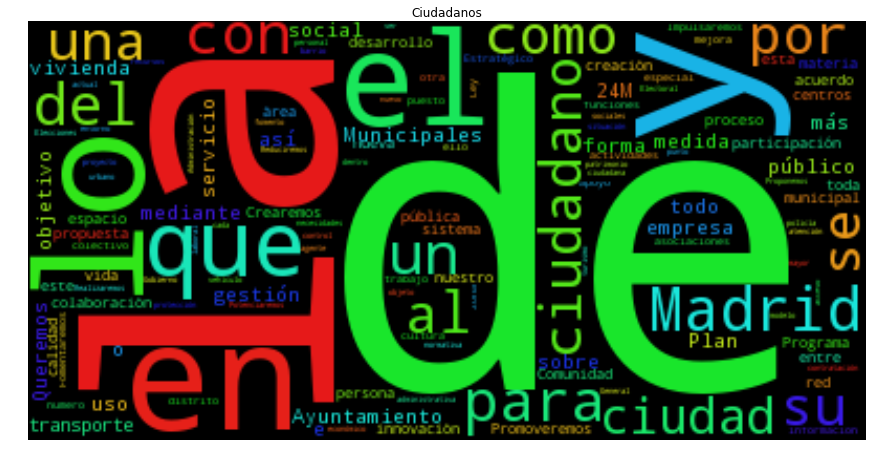

In [7]:
showWordCloud(wordcloud, "Ciudadanos")

Hemos descargado las **stopwords**, pero no las hemos utilizado

In [8]:
wordcloud = WordCloud(background_color="white", max_words=1000, stopwords = spanish_stopwords).generate(text)

Debido a que tenemos varios archivos que analizar y no podemos perder el tiempo en hacerlos uno a uno, es conveniente definir una función que lo haga por nosotros:

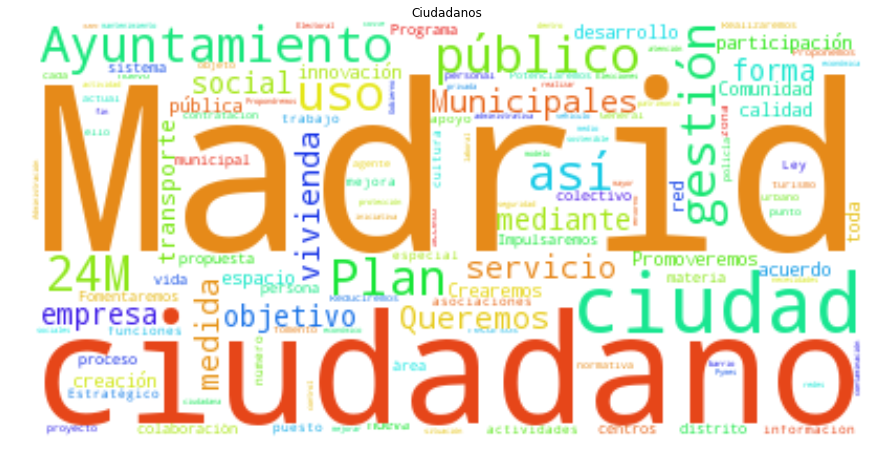

In [9]:
showWordCloud(wordcloud, "Ciudadanos")

Debido a que los programas electorales descargados son de Madrid, esta palabra va a salir muchas veces pero no es relevante, por lo que añadimos "Madrid" a la lista de stopwords.

In [10]:
spanish_stopwords.add(u'madrid')
spanish_stopwords

{u'a',
 u'al',
 u'algo',
 u'algunas',
 u'algunos',
 u'ante',
 u'antes',
 u'como',
 u'con',
 u'contra',
 u'cual',
 u'cuando',
 u'de',
 u'del',
 u'desde',
 u'donde',
 u'durante',
 u'e',
 u'el',
 u'ella',
 u'ellas',
 u'ellos',
 u'en',
 u'entre',
 u'era',
 u'erais',
 u'eran',
 u'eras',
 u'eres',
 u'es',
 u'esa',
 u'esas',
 u'ese',
 u'eso',
 u'esos',
 u'esta',
 u'estaba',
 u'estabais',
 u'estaban',
 u'estabas',
 u'estad',
 u'estada',
 u'estadas',
 u'estado',
 u'estados',
 u'estamos',
 u'estando',
 u'estar',
 u'estaremos',
 u'estar\xe1',
 u'estar\xe1n',
 u'estar\xe1s',
 u'estar\xe9',
 u'estar\xe9is',
 u'estar\xeda',
 u'estar\xedais',
 u'estar\xedamos',
 u'estar\xedan',
 u'estar\xedas',
 u'estas',
 u'este',
 u'estemos',
 u'esto',
 u'estos',
 u'estoy',
 u'estuve',
 u'estuviera',
 u'estuvierais',
 u'estuvieran',
 u'estuvieras',
 u'estuvieron',
 u'estuviese',
 u'estuvieseis',
 u'estuviesen',
 u'estuvieses',
 u'estuvimos',
 u'estuviste',
 u'estuvisteis',
 u'estuvi\xe9ramos',
 u'estuvi\xe9semos',


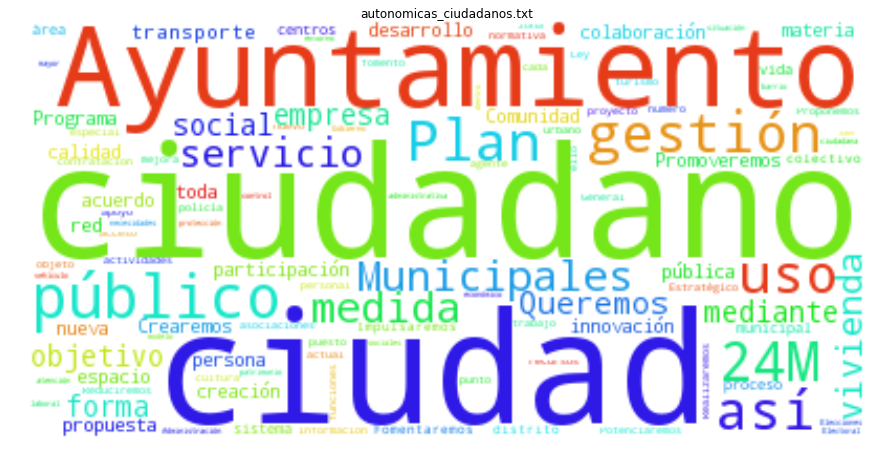

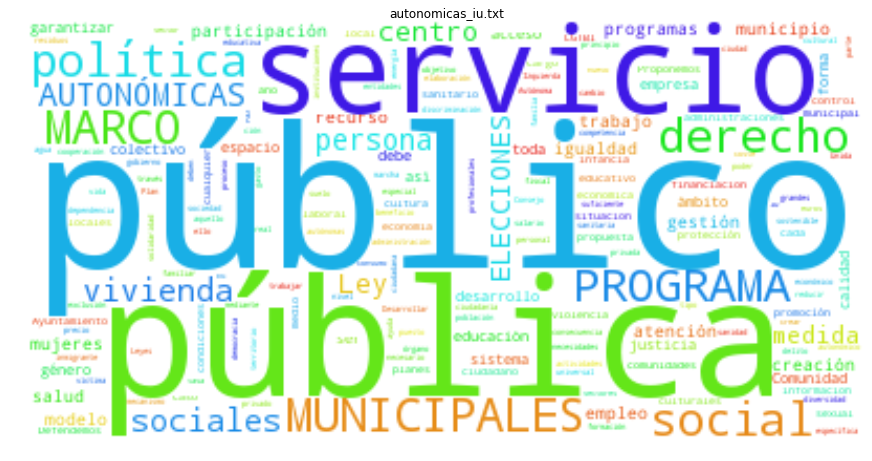

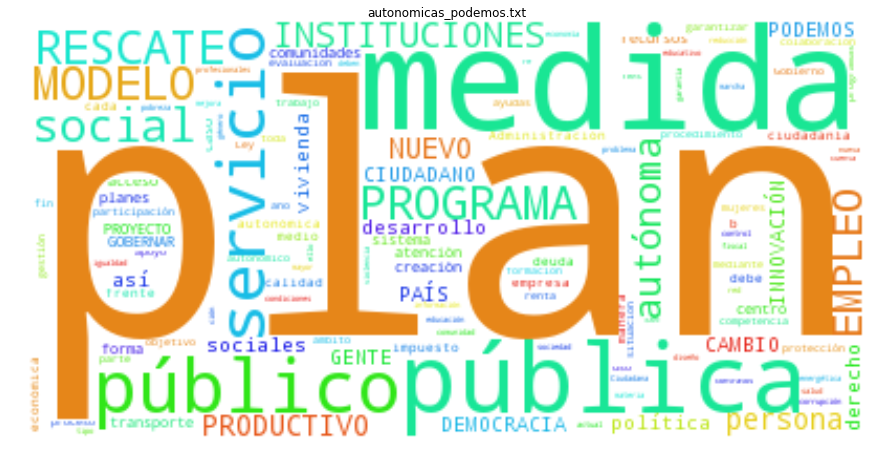

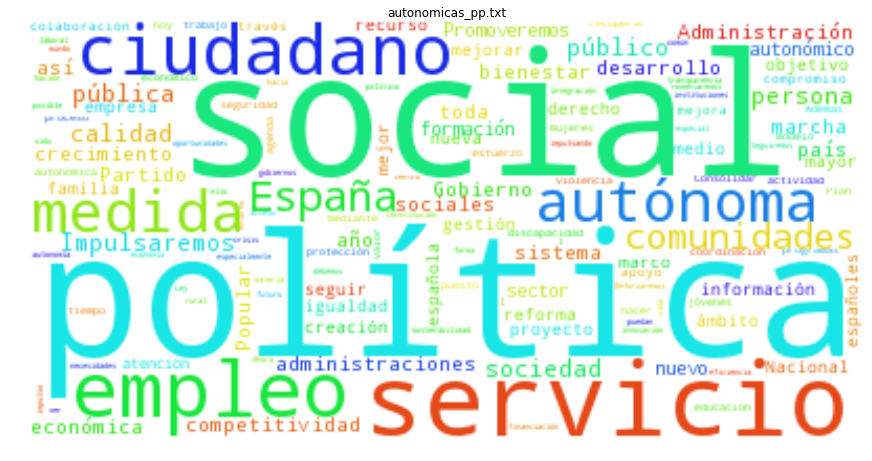

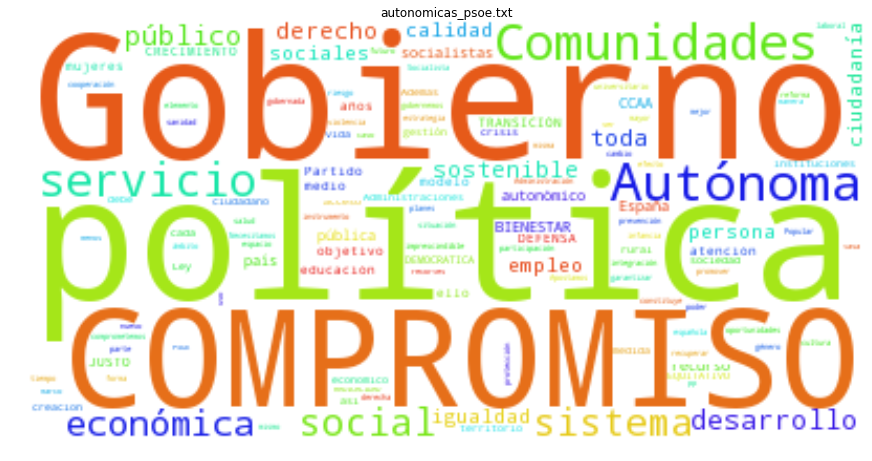

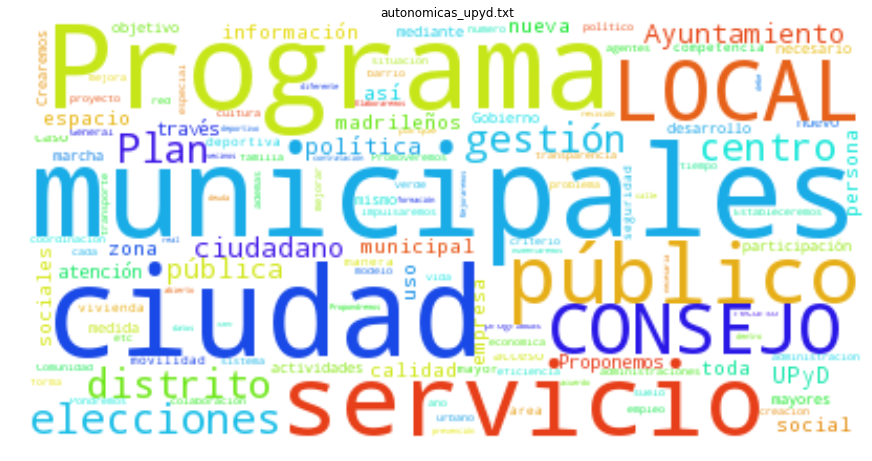

In [11]:
def analyzeDocuments():
    documents = !ls *.txt
    for document in documents:
        text = codecs.open(document, 'r', 'utf-8').read()
        wc = WordCloud(background_color="white", max_words=1000, stopwords = spanish_stopwords).generate(text)
        showWordCloud(wc, document)
        
analyzeDocuments()